In [292]:
import pandas as pd
import numpy as np
import seaborn as sns
import category_encoders as ce
import re
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [326]:
df = pd.read_csv('hotels.csv')
test = pd.read_csv('Data/hotels_test.csv')
train = pd.read_csv('Data/hotels_train.csv')
test['sample'] = 0 # тест
train['sample'] = 1 # тренировачный
df = test.append(train, sort=False)
df.head()

C:\Users\Denis\AppData\Local\Temp\ipykernel_19164\55039208.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = test.append(train, sort=False)


,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,tags,days_since_review,lat,lng,sample,reviewer_score
0,Via Senigallia 6 20161 Milan Italy,904,7/21/2017,8.1,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,62,1,"[' Leisure trip ', ' Couple ', ' Double Room '...",13 days,45.533137,9.171102,0,NaN
1,Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...,612,12/12/2016,8.6,Urban Lodge Hotel,Belgium,No tissue paper box was present at the room,10,5018,No Positive,0,7,"[' Leisure trip ', ' Group ', ' Triple Room ',...",234 day,52.385649,4.834443,0,NaN
2,Mallorca 251 Eixample 08008 Barcelona Spain,46,11/26/2015,8.3,Alexandra Barcelona A DoubleTree by Hilton,Sweden,Pillows,3,351,Nice welcoming and service,5,15,"[' Business trip ', ' Solo traveler ', ' Twin ...",616 day,41.393192,2.161520,0,NaN
3,Piazza Della Repubblica 17 Central Station 201...,241,10/17/2015,9.1,Hotel Principe Di Savoia,United States of America,No Negative,0,1543,Everything including the nice upgrade The Hot...,27,9,"[' Leisure trip ', ' Couple ', ' Ambassador Ju...",656 day,45.479888,9.196298,0,NaN
4,Singel 303 309 Amsterdam City Center 1012 WJ A...,834,5/16/2016,9.1,Hotel Esther a,United Kingdom,No Negative,0,4687,Lovely hotel v welcoming staff,7,2,"[' Business trip ', ' Solo traveler ', ' Class...",444 day,52.370545,4.888644,0,NaN


In [294]:
df.isna().sum()

hotel_address                                      0
additional_number_of_scoring                       0
review_date                                        0
average_score                                      0
hotel_name                                         0
reviewer_nationality                               0
negative_review                                    0
review_total_negative_word_counts                  0
total_number_of_reviews                            0
positive_review                                    0
review_total_positive_word_counts                  0
total_number_of_reviews_reviewer_has_given         0
tags                                               0
days_since_review                                  0
lat                                             3268
lng                                             3268
sample                                             0
reviewer_score                                128935
dtype: int64

In [295]:
integer_columns = df.select_dtypes(['int64','float64']).columns
integer_columns

Index(['additional_number_of_scoring', 'average_score',
       'review_total_negative_word_counts', 'total_number_of_reviews',
       'review_total_positive_word_counts',
       'total_number_of_reviews_reviewer_has_given', 'lat', 'lng', 'sample',
       'reviewer_score'],
      dtype='object')

In [296]:
cat_columns = df.select_dtypes('object').columns
cat_columns

Index(['hotel_address', 'review_date', 'hotel_name', 'reviewer_nationality',
       'negative_review', 'positive_review', 'tags', 'days_since_review'],
      dtype='object')

In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515738 entries, 0 to 386802
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               515738 non-null  object 
 1   additional_number_of_scoring                515738 non-null  int64  
 2   review_date                                 515738 non-null  object 
 3   average_score                               515738 non-null  float64
 4   hotel_name                                  515738 non-null  object 
 5   reviewer_nationality                        515738 non-null  object 
 6   negative_review                             515738 non-null  object 
 7   review_total_negative_word_counts           515738 non-null  int64  
 8   total_number_of_reviews                     515738 non-null  int64  
 9   positive_review                             515738 non-null  object 
 

In [298]:
df['hotel_name'].nunique()

1492

In [299]:
df['hotel_address'] = df['hotel_address'].apply(lambda x: x.split()[-1] if x.split()[-1] != 'Kingdom' else 'UK' )
df.rename(columns={'hotel_address':'country'}, inplace=True)
df.head()

In [300]:
df['review_date'].describe()

count       515738
unique         731
top       8/2/2017
freq          2585
Name: review_date, dtype: object

In [301]:
df['tags'][0]

0    [' Leisure trip ', ' Couple ', ' Double Room '...
0    [' Leisure trip ', ' Couple ', ' Studio Suite ...
Name: tags, dtype: object

In [302]:
reg = "\'(.*?)\'"
#df['tags'] = list(df['tags'])
df['tags'] = df['tags'].apply(lambda x: re.findall(reg,x))

In [303]:
df['tags'].explode().value_counts()


 Leisure trip                                 417778
 Submitted from a mobile device               307640
 Couple                                       252294
 Stayed 1 night                               193645
 Stayed 2 nights                              133937
                                               ...  
 Duplex King Suite 3 Adults                        1
 Suite Free Executive Lounge Access                1
 Suite with Executive Lounge Access                1
 Family Room three bedrooms communicating          1
 Quadruple Room 2 Adults 2 Children                1
Name: tags, Length: 2428, dtype: int64

In [304]:
df.head()

,country,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,tags,days_since_review,lat,lng,sample,reviewer_score
0,Italy,904,7/21/2017,8.1,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,62,1,"[ Leisure trip , Couple , Double Room , Sta...",13 days,45.533137,9.171102,0,NaN
1,Netherlands,612,12/12/2016,8.6,Urban Lodge Hotel,Belgium,No tissue paper box was present at the room,10,5018,No Positive,0,7,"[ Leisure trip , Group , Triple Room , Stay...",234 day,52.385649,4.834443,0,NaN
2,Spain,46,11/26/2015,8.3,Alexandra Barcelona A DoubleTree by Hilton,Sweden,Pillows,3,351,Nice welcoming and service,5,15,"[ Business trip , Solo traveler , Twin Room ...",616 day,41.393192,2.161520,0,NaN
3,Italy,241,10/17/2015,9.1,Hotel Principe Di Savoia,United States of America,No Negative,0,1543,Everything including the nice upgrade The Hot...,27,9,"[ Leisure trip , Couple , Ambassador Junior ...",656 day,45.479888,9.196298,0,NaN
4,Netherlands,834,5/16/2016,9.1,Hotel Esther a,United Kingdom,No Negative,0,4687,Lovely hotel v welcoming staff,7,2,"[ Business trip , Solo traveler , Classic Do...",444 day,52.370545,4.888644,0,NaN


In [305]:
df.drop(columns=['hotel_name','lat','lng'], inplace=True) # признаки из которых ничего полезного нельзя взять

In [306]:
df.isna().sum()

country                                            0
additional_number_of_scoring                       0
review_date                                        0
average_score                                      0
reviewer_nationality                               0
negative_review                                    0
review_total_negative_word_counts                  0
total_number_of_reviews                            0
positive_review                                    0
review_total_positive_word_counts                  0
total_number_of_reviews_reviewer_has_given         0
tags                                               0
days_since_review                                  0
sample                                             0
reviewer_score                                128935
dtype: int64

In [307]:
df['review_date'] = pd.to_datetime(df['review_date'], format='%m/%d/%Y')
df['month'] = df['review_date'].dt.month
df.rename(columns={'review_date':'year'}, inplace=True)
df['year'] = df['year'].dt.year
df.head()

,country,additional_number_of_scoring,year,average_score,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,tags,days_since_review,sample,reviewer_score,month
0,Italy,904,2017,8.1,United Kingdom,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,62,1,"[ Leisure trip , Couple , Double Room , Sta...",13 days,0,NaN,7
1,Netherlands,612,2016,8.6,Belgium,No tissue paper box was present at the room,10,5018,No Positive,0,7,"[ Leisure trip , Group , Triple Room , Stay...",234 day,0,NaN,12
2,Spain,46,2015,8.3,Sweden,Pillows,3,351,Nice welcoming and service,5,15,"[ Business trip , Solo traveler , Twin Room ...",616 day,0,NaN,11
3,Italy,241,2015,9.1,United States of America,No Negative,0,1543,Everything including the nice upgrade The Hot...,27,9,"[ Leisure trip , Couple , Ambassador Junior ...",656 day,0,NaN,10
4,Netherlands,834,2016,9.1,United Kingdom,No Negative,0,4687,Lovely hotel v welcoming staff,7,2,"[ Business trip , Solo traveler , Classic Do...",444 day,0,NaN,5


In [308]:
mask = df['reviewer_nationality'].map(df['reviewer_nationality'].value_counts(normalize=True)) < 0.01
df['reviewer_nationality'] = df['reviewer_nationality'].mask(mask,'Other')
df.reviewer_nationality.value_counts(normalize=True)

 United Kingdom               0.475524
Other                         0.222159
 United States of America     0.068711
 Australia                    0.042048
 Ireland                      0.028749
 United Arab Emirates         0.019845
 Saudi Arabia                 0.017356
 Netherlands                  0.017009
 Switzerland                  0.016826
 Germany                      0.015397
 Canada                       0.015306
 France                       0.014147
 Israel                       0.012817
 Italy                        0.011855
 Belgium                      0.011694
 Turkey                       0.010556
Name: reviewer_nationality, dtype: float64

In [309]:
bin_encoder = ce.BinaryEncoder(cols=['reviewer_nationality'])
type_bin = bin_encoder.fit_transform(df['reviewer_nationality'])
df = pd.concat([df, type_bin], axis=1)
df_copy = df.copy().drop(columns='reviewer_nationality')
df_copy

,country,additional_number_of_scoring,year,average_score,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,tags,days_since_review,sample,reviewer_score,month,reviewer_nationality_0,reviewer_nationality_1,reviewer_nationality_2,reviewer_nationality_3,reviewer_nationality_4
0,Italy,904,2017,8.1,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,62,1,"[ Leisure trip , Couple , Double Room , Sta...",13 days,0,NaN,7,0,0,0,0,1
1,Netherlands,612,2016,8.6,No tissue paper box was present at the room,10,5018,No Positive,0,7,"[ Leisure trip , Group , Triple Room , Stay...",234 day,0,NaN,12,0,0,0,1,0
2,Spain,46,2015,8.3,Pillows,3,351,Nice welcoming and service,5,15,"[ Business trip , Solo traveler , Twin Room ...",616 day,0,NaN,11,0,0,0,1,1
3,Italy,241,2015,9.1,No Negative,0,1543,Everything including the nice upgrade The Hot...,27,9,"[ Leisure trip , Couple , Ambassador Junior ...",656 day,0,NaN,10,0,0,1,0,0
4,Netherlands,834,2016,9.1,No Negative,0,4687,Lovely hotel v welcoming staff,7,2,"[ Business trip , Solo traveler , Classic Do...",444 day,0,NaN,5,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386798,UK,107,2017,9.0,No Negative,0,617,Tr s proche du metro Earl s court,10,10,"[ Leisure trip , Group , Club Double or Twin...",106 day,1,8.8,4,0,1,0,1,1
386799,Austria,272,2017,8.4,No Negative,0,3224,The bed was so comfy I stayed with my boyfrie...,93,1,"[ Leisure trip , Couple , Standard Double Ro...",171 day,1,9.2,2,0,1,1,1,1
386800,UK,457,2016,6.8,room is really small but guess is normal in L...,12,2751,great location simple check in out nice shower,9,21,"[ Business trip , Solo traveler , Single Roo...",543 day,1,8.3,2,0,0,1,0,1
386801,UK,365,2017,8.1,No Negative,0,1567,Location and very comfy bed,6,28,"[ Leisure trip , Solo traveler , Deluxe Doub...",74 days,1,9.2,5,0,1,1,0,1


In [310]:
bin_encoder = ce.OrdinalEncoder(cols=['country'])
type_bin = bin_encoder.fit_transform(df_copy['country'])
df = pd.concat([df_copy, type_bin], axis=1)
df_copy = df.copy().drop(columns='country')
df_copy

,additional_number_of_scoring,year,average_score,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,tags,days_since_review,sample,reviewer_score,month,reviewer_nationality_0,reviewer_nationality_1,reviewer_nationality_2,reviewer_nationality_3,reviewer_nationality_4
0,904,2017,8.1,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,62,1,"[ Leisure trip , Couple , Double Room , Sta...",13 days,0,NaN,7,0,0,0,0,1
1,612,2016,8.6,No tissue paper box was present at the room,10,5018,No Positive,0,7,"[ Leisure trip , Group , Triple Room , Stay...",234 day,0,NaN,12,0,0,0,1,0
2,46,2015,8.3,Pillows,3,351,Nice welcoming and service,5,15,"[ Business trip , Solo traveler , Twin Room ...",616 day,0,NaN,11,0,0,0,1,1
3,241,2015,9.1,No Negative,0,1543,Everything including the nice upgrade The Hot...,27,9,"[ Leisure trip , Couple , Ambassador Junior ...",656 day,0,NaN,10,0,0,1,0,0
4,834,2016,9.1,No Negative,0,4687,Lovely hotel v welcoming staff,7,2,"[ Business trip , Solo traveler , Classic Do...",444 day,0,NaN,5,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386798,107,2017,9.0,No Negative,0,617,Tr s proche du metro Earl s court,10,10,"[ Leisure trip , Group , Club Double or Twin...",106 day,1,8.8,4,0,1,0,1,1
386799,272,2017,8.4,No Negative,0,3224,The bed was so comfy I stayed with my boyfrie...,93,1,"[ Leisure trip , Couple , Standard Double Ro...",171 day,1,9.2,2,0,1,1,1,1
386800,457,2016,6.8,room is really small but guess is normal in L...,12,2751,great location simple check in out nice shower,9,21,"[ Business trip , Solo traveler , Single Roo...",543 day,1,8.3,2,0,0,1,0,1
386801,365,2017,8.1,No Negative,0,1567,Location and very comfy bed,6,28,"[ Leisure trip , Solo traveler , Deluxe Doub...",74 days,1,9.2,5,0,1,1,0,1


In [311]:
df_copy['days_since_review'] = df_copy['days_since_review'].apply(lambda x: int(x.split()[0]))
df_copy['days_since_review']

0          13
1         234
2         616
3         656
4         444
         ... 
386798    106
386799    171
386800    543
386801     74
386802    363
Name: days_since_review, Length: 515738, dtype: int64

In [312]:
df_copy.drop(columns=['negative_review','positive_review'], inplace=True)
df_copy.head()

,additional_number_of_scoring,year,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,tags,days_since_review,sample,reviewer_score,month,reviewer_nationality_0,reviewer_nationality_1,reviewer_nationality_2,reviewer_nationality_3,reviewer_nationality_4
0,904,2017,8.1,52,16670,62,1,"[ Leisure trip , Couple , Double Room , Sta...",13,0,NaN,7,0,0,0,0,1
1,612,2016,8.6,10,5018,0,7,"[ Leisure trip , Group , Triple Room , Stay...",234,0,NaN,12,0,0,0,1,0
2,46,2015,8.3,3,351,5,15,"[ Business trip , Solo traveler , Twin Room ...",616,0,NaN,11,0,0,0,1,1
3,241,2015,9.1,0,1543,27,9,"[ Leisure trip , Couple , Ambassador Junior ...",656,0,NaN,10,0,0,1,0,0
4,834,2016,9.1,0,4687,7,2,"[ Business trip , Solo traveler , Classic Do...",444,0,NaN,5,0,0,0,0,1


In [313]:
df_tags = df_copy.explode('tags').reset_index()

In [314]:
tags_counts = df_tags['tags'].value_counts()[:25]
df_tags = pd.DataFrame(tags_counts).reset_index()
top_tags = set(df_tags['index'])

In [315]:
df_copy

,additional_number_of_scoring,year,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,tags,days_since_review,sample,reviewer_score,month,reviewer_nationality_0,reviewer_nationality_1,reviewer_nationality_2,reviewer_nationality_3,reviewer_nationality_4
0,904,2017,8.1,52,16670,62,1,"[ Leisure trip , Couple , Double Room , Sta...",13,0,NaN,7,0,0,0,0,1
1,612,2016,8.6,10,5018,0,7,"[ Leisure trip , Group , Triple Room , Stay...",234,0,NaN,12,0,0,0,1,0
2,46,2015,8.3,3,351,5,15,"[ Business trip , Solo traveler , Twin Room ...",616,0,NaN,11,0,0,0,1,1
3,241,2015,9.1,0,1543,27,9,"[ Leisure trip , Couple , Ambassador Junior ...",656,0,NaN,10,0,0,1,0,0
4,834,2016,9.1,0,4687,7,2,"[ Business trip , Solo traveler , Classic Do...",444,0,NaN,5,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386798,107,2017,9.0,0,617,10,10,"[ Leisure trip , Group , Club Double or Twin...",106,1,8.8,4,0,1,0,1,1
386799,272,2017,8.4,0,3224,93,1,"[ Leisure trip , Couple , Standard Double Ro...",171,1,9.2,2,0,1,1,1,1
386800,457,2016,6.8,12,2751,9,21,"[ Business trip , Solo traveler , Single Roo...",543,1,8.3,2,0,0,1,0,1
386801,365,2017,8.1,0,1567,6,28,"[ Leisure trip , Solo traveler , Deluxe Doub...",74,1,9.2,5,0,1,1,0,1


In [316]:
for tag in top_tags:
    tag_name = str(tag)
    df_copy[tag_name] = df_copy['tags'].apply(lambda x: 1 if tag_name in x else 0)
df_copy.drop(columns=['tags'], axis=1, inplace=True)
df_copy

,additional_number_of_scoring,year,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,days_since_review,sample,reviewer_score,...,Couple,Standard Twin Room,Standard Double or Twin Room,Stayed 3 nights,Stayed 2 nights,Superior Double or Twin Room,Business trip,Group,Family with older children,Solo traveler
0,904,2017,8.1,52,16670,62,1,13,0,NaN,...,1,0,0,0,1,0,0,0,0,0
1,612,2016,8.6,10,5018,0,7,234,0,NaN,...,0,0,0,0,0,0,0,1,0,0
2,46,2015,8.3,3,351,5,15,616,0,NaN,...,0,0,0,0,0,0,1,0,0,1
3,241,2015,9.1,0,1543,27,9,656,0,NaN,...,1,0,0,0,0,0,0,0,0,0
4,834,2016,9.1,0,4687,7,2,444,0,NaN,...,0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386798,107,2017,9.0,0,617,10,10,106,1,8.8,...,0,0,0,0,1,0,0,1,0,0
386799,272,2017,8.4,0,3224,93,1,171,1,9.2,...,1,0,0,0,0,0,0,0,0,0
386800,457,2016,6.8,12,2751,9,21,543,1,8.3,...,0,0,0,0,0,0,1,0,0,1
386801,365,2017,8.1,0,1567,6,28,74,1,9.2,...,0,0,0,0,1,0,0,0,0,1


In [317]:

# Create correlation matrix
corr_matrix = df_copy.drop(['sample'], axis=1).corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]

# Drop features
df_copy.drop(to_drop, axis=1, inplace=True)


In [318]:
submisson = pd.read_csv('Data/submission.csv')
train = pd.read_csv('Data/hotels_train.csv')
test = pd.read_csv('Data/hotels_test.csv')
submisson

,reviewer_score,id
0,1,488440
1,10,274649
2,3,374688
3,10,404352
4,9,451596
...,...,...
128930,7,495812
128931,1,315577
128932,3,511968
128933,6,303386


In [319]:
RANDOM_SEED = 42
train_data = df_copy.query('sample == 1').drop(['sample'], axis=1)
test_data = df_copy.query('sample == 0').drop(['sample'], axis=1)
y = train_data['reviewer_score'].values
X = train_data.drop(['reviewer_score'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=RANDOM_SEED)

In [320]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

    # Создаём модель
regr = RandomForestRegressor(n_estimators=100)

    # Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)

    # Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.
    # Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)
      # Сравниваем предсказанные значения (y_pred) с реальными (y_test) и смотрим, насколько они отличаются
    # Метрика называется Mean Absolute Percentage Error (MAPE) и показывает среднюю абсолютную процентную ошибку предсказанных значений в отношении фактических.
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAPE: 0.13569439266981886


<AxesSubplot:>

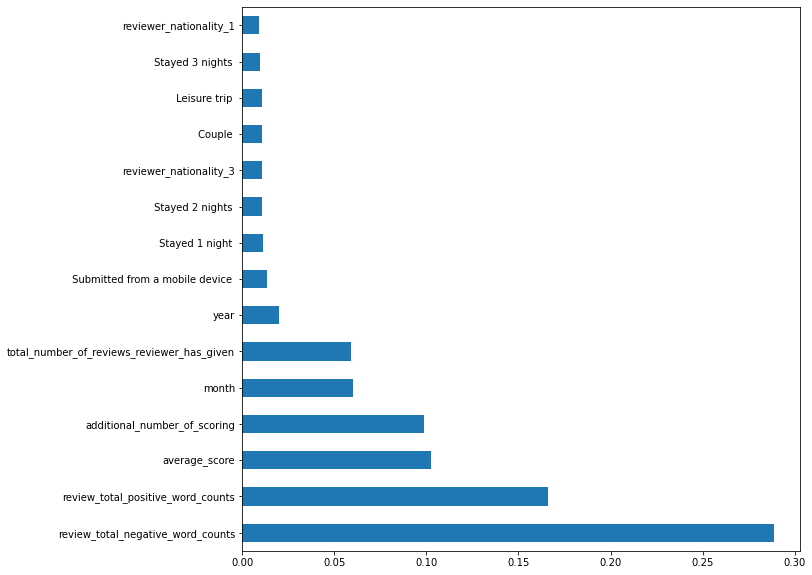

In [321]:
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(regr.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

In [322]:
test_data.head()

,additional_number_of_scoring,year,average_score,review_total_negative_word_counts,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,month,reviewer_nationality_0,reviewer_nationality_1,...,Stayed 1 night,Couple,Standard Twin Room,Standard Double or Twin Room,Stayed 3 nights,Stayed 2 nights,Superior Double or Twin Room,Group,Family with older children,Solo traveler
0,904,2017,8.1,52,62,1,NaN,7,0,0,...,0,1,0,0,0,1,0,0,0,0
1,612,2016,8.6,10,0,7,NaN,12,0,0,...,1,0,0,0,0,0,0,1,0,0
2,46,2015,8.3,3,5,15,NaN,11,0,0,...,1,0,0,0,0,0,0,0,0,1
3,241,2015,9.1,0,27,9,NaN,10,0,0,...,1,1,0,0,0,0,0,0,0,0
4,834,2016,9.1,0,7,2,NaN,5,0,0,...,0,0,0,0,0,1,0,0,0,1


In [323]:
test_data.drop(['reviewer_score'], axis=1, inplace=True)

In [324]:
predict_submission = regr.predict(test_data)
predict_submission

array([8.576, 7.165, 8.365, ..., 7.876, 9.369, 6.785])

In [325]:
submisson['reviewer_score'] = predict_submission
submisson.to_csv('submission_res.csv', index=False)
submisson.head()

,reviewer_score,id
0,8.576,488440
1,7.165,274649
2,8.365,374688
3,9.625,404352
4,9.709,451596
